2022-02-22 <br/>
World Freedom index <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-02-22/readme.md

Subplot - Completed 


In [40]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [41]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-22/freedom.csv')
df.head()

,country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
0,Afghanistan,1995,7,7,NF,142,Asia,1
1,Afghanistan,1996,7,7,NF,142,Asia,1
2,Afghanistan,1997,7,7,NF,142,Asia,1
3,Afghanistan,1998,7,7,NF,142,Asia,1
4,Afghanistan,1999,7,7,NF,142,Asia,1


In [42]:
df.Status.nunique() 

3

In [43]:
grouped_df = df.groupby(['Status','year'])[['CL','PR']].mean().reset_index()

In [50]:
grouped_df.Status
grouped_df.Status.replace({'F': 'Free', 'NF': 'Not Free', 'PF':'Partially Free'},inplace=True)

In [59]:
fig = px.line(grouped_df, x="year", y=['CL','PR'], color='Status',
             # hover_data={"date": "|%B %d, %Y"},
              title='Polititcal Views - Combined')

fig.add_annotation(dict(font=dict(color='black',size=12),
                                        x=.03,
                                        y=.25,
                                        showarrow=False,
                                        text="Civil and Political Liberites tend to align closeky with the country's freedom",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))


fig.show()

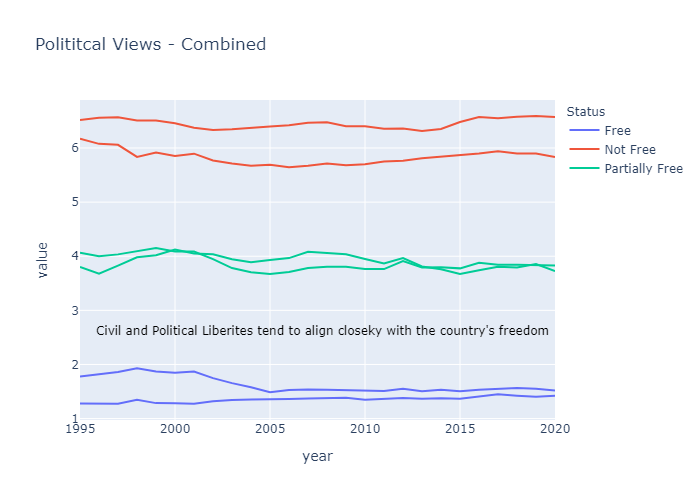

In [60]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [46]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Civil Liberties", "Political Liberties"))

for c in grouped_df['Status'].unique():
    df_val = grouped_df[grouped_df['Status']==c]
    fig.add_trace(go.Scatter(x=df_val['year'], y = df_val['CL'], name = c,legendgroup='group1'),
              row=1, col=1)
    fig.add_trace(go.Scatter(x=df_val['year'], y = df_val['PR'], name = c,legendgroup='group1'),
              row=1, col=2)

fig.update_layout(height=500, width=1300,
                  title_text="Plotting different Liberites over time")

fig.show()

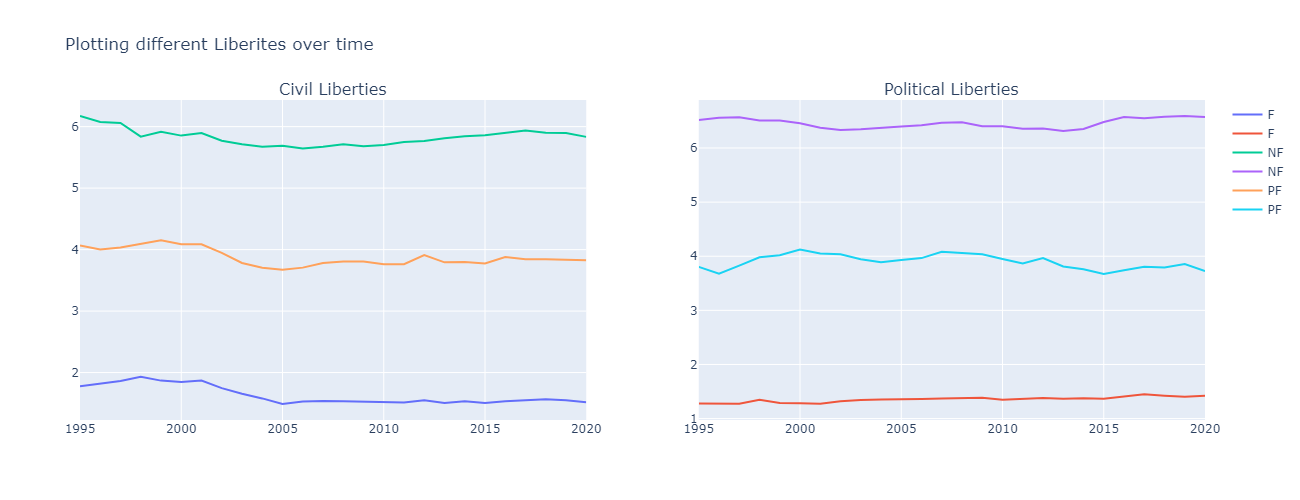

In [47]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)